### Data Processing

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read CSV of 5yr historical price data
csv_path = "Data/BTC-USD.csv"
BTC_df = pd.read_csv(csv_path)

BTC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [3]:
# Convert Data column to Datetime
BTC_df["Date"] = pd.to_datetime(BTC_df["Date"])

<AxesSubplot:xlabel='Date'>

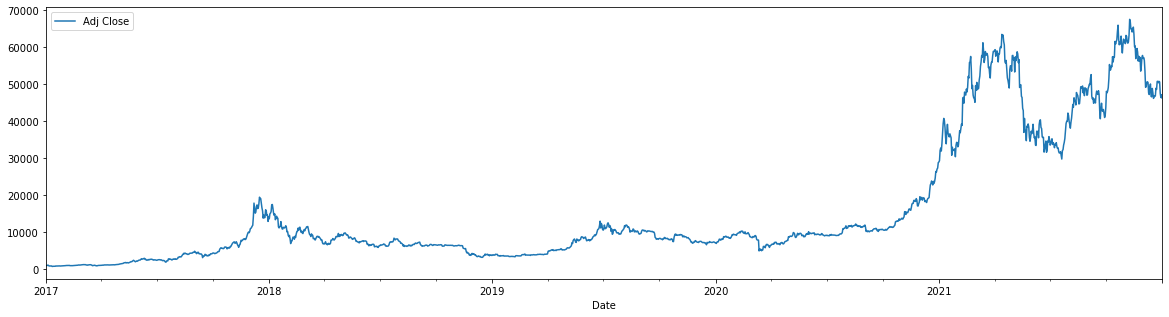

In [4]:
# Price Chart
BTC_df.plot(x="Date", y="Adj Close", figsize=(20,5))

### Trends by Time of Year

In [5]:
# Add columns for pct. gain, difference between high and low
# Split Date column into Day, Month, and Year columns
BTC_df["Pct Gain"] = (BTC_df["Adj Close"] - BTC_df["Open"]) / BTC_df["Open"] * 100
BTC_df["Price Swings"] = BTC_df["High"] - BTC_df["Low"]
#BTC_df["Day"] = BTC_df["Date"].dt.day
#BTC_df["Month"] = BTC_df["Date"].dt.month
#BTC_df["Year"] = BTC_df["Date"].dt.year
BTC_df["MM-DD"] = BTC_df["Date"].dt.strftime('%m-%d')

BTC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Pct Gain,Price Swings,MM-DD
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,3.597437,44.381042,01-01
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,2.316503,34.687989,01-02
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,2.176976,22.479980,01-03
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,10.563956,115.020020,01-04
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,-12.392691,280.682984,01-05


In [6]:
# Group by Month and Day, and take the average of the Volume, Pct Gain, and Price Swings columns
BTC_MMDD = BTC_df.groupby(["MM-DD"]).mean()[
    ["Volume", "Pct Gain", "Price Swings"]
]

BTC_MMDD.head()

,Volume,Pct Gain,Price Swings
MM-DD,,,
01-01,1.481183e+10,0.868315,404.398181
01-02,2.219623e+10,4.214800,1357.416113
01-03,2.567280e+10,1.691497,783.040674
01-04,2.531677e+10,2.343353,1249.987061
01-05,2.335222e+10,1.271929,1442.289819


<AxesSubplot:xlabel='MM-DD'>

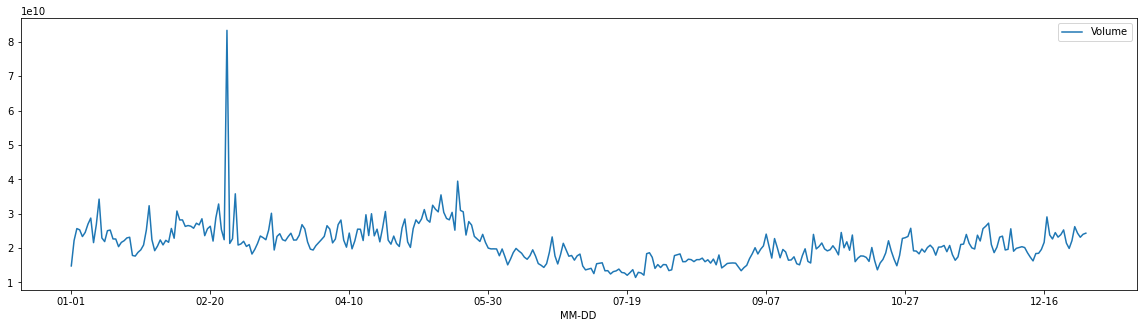

In [7]:
BTC_MMDD.plot(y="Volume", figsize=(20,5))
#plt.xticks(rotation=90)

<AxesSubplot:xlabel='MM-DD'>

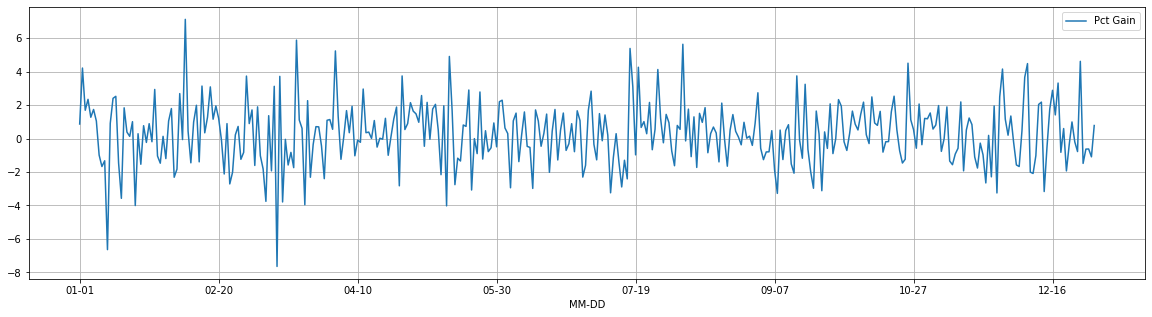

In [8]:
BTC_MMDD.plot(y="Pct Gain", figsize=(20,5), grid=True)

<AxesSubplot:xlabel='MM-DD'>

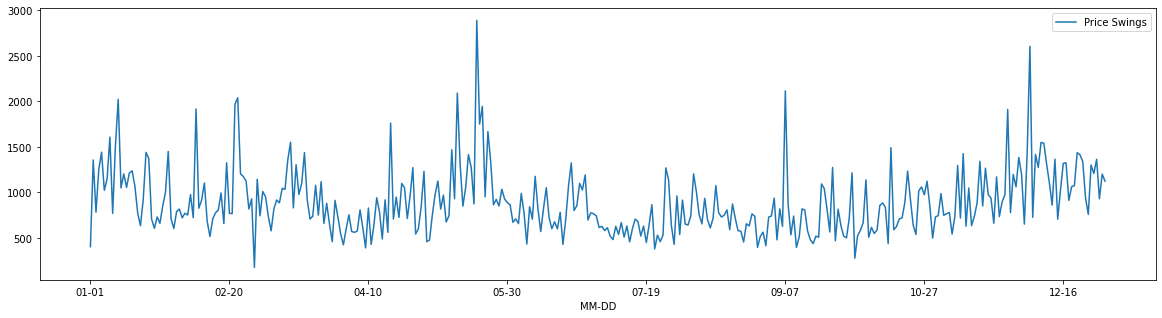

In [9]:
BTC_MMDD.plot(y="Price Swings", figsize=(20,5))

### Large Gains/Losses

In [10]:
# Pull all the days where BTC gained or lost at least 5%
big_gains = BTC_df.loc[BTC_df["Pct Gain"] >= 5, :]
big_losses = BTC_df.loc[BTC_df["Pct Gain"] <= -5, :]

# Combine the DataFrames and sort by Date
big_days = pd.concat([big_gains, big_losses])
big_days = big_days.sort_values(by=["Date"])

big_days

,Date,Open,High,Low,Close,Adj Close,Volume,Pct Gain,Price Swings,MM-DD
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,10.563956,115.020020,01-04
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,-12.392691,280.682984,01-05
5,2017-01-06,1014.239990,1046.810059,883.943970,902.200989,902.200989,351876000,-11.046597,162.866089,01-06
10,2017-01-11,908.114990,919.447998,762.765015,777.757019,777.757019,310928992,-14.354787,156.682983,01-11
16,2017-01-17,830.945984,910.560974,830.796021,907.937988,907.937988,155095008,9.265585,79.764953,01-17
...,...,...,...,...,...,...,...,...,...,...
1797,2021-12-03,56509.164063,57482.167969,52496.585938,53598.246094,53598.246094,39789134215,-5.151232,4985.582031,12-03
1798,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469,-8.426120,11030.062500,12-04
1803,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,29603577251,-5.506356,3438.812500,12-09
1807,2021-12-13,50114.742188,50205.000000,45894.847656,46737.480469,46737.480469,32166727776,-6.739058,4310.152344,12-13


<AxesSubplot:xlabel='Date'>

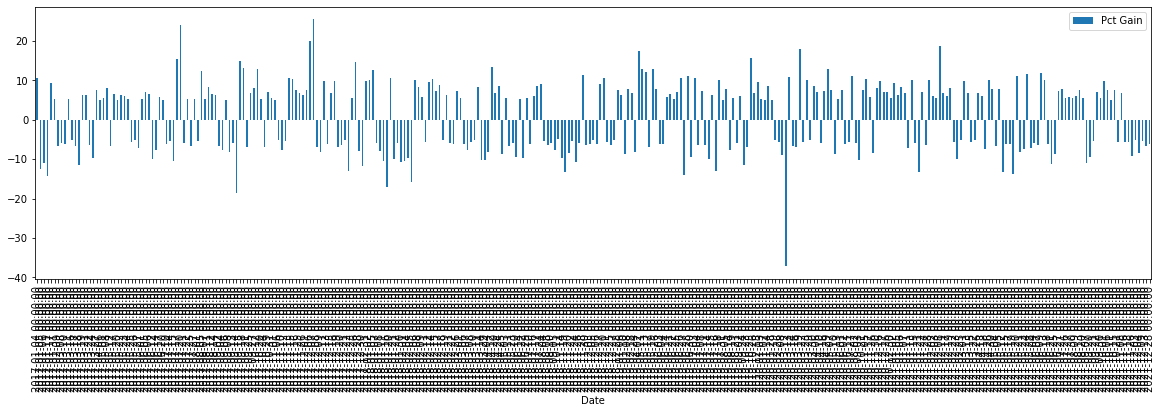

In [11]:
big_days.plot.bar(x="Date", y="Pct Gain", figsize=(20,5))

In [12]:
# Pull all the days where BTC gained or lost at least 5%
huge_gains = BTC_df.loc[BTC_df["Pct Gain"] >= 10, :]
huge_losses = BTC_df.loc[BTC_df["Pct Gain"] <= -10, :]

# Combine the DataFrames and sort by Date
huge_days = pd.concat([huge_gains, huge_losses])
huge_days = huge_days.sort_values(by=["Date"])

huge_days

,Date,Open,High,Low,Close,Adj Close,Volume,Pct Gain,Price Swings,MM-DD
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,10.563956,115.020020,01-04
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,-12.392691,280.682984,01-05
5,2017-01-06,1014.239990,1046.810059,883.943970,902.200989,902.200989,351876000,-11.046597,162.866089,01-06
10,2017-01-11,908.114990,919.447998,762.765015,777.757019,777.757019,310928992,-14.354787,156.682983,01-11
76,2017-03-18,1099.689941,1114.069946,957.655029,973.817993,973.817993,621302016,-11.446131,156.414917,03-18
...,...,...,...,...,...,...,...,...,...,...
1600,2021-05-20,36753.667969,42462.984375,35050.617188,40782.738281,40782.738281,88281943359,10.962362,7412.367187,05-20
1604,2021-05-24,34700.363281,39835.140625,34551.082031,38705.980469,38705.980469,67359584098,11.543445,5284.058594,05-24
1620,2021-06-09,33416.976563,37537.371094,32475.865234,37345.121094,37345.121094,53972919008,11.754937,5061.505860,06-09
1632,2021-06-21,35641.144531,35721.640625,31295.935547,31676.693359,31676.693359,52809038594,-11.123243,4425.705078,06-21


<AxesSubplot:xlabel='Date', ylabel='Price Change (%)'>

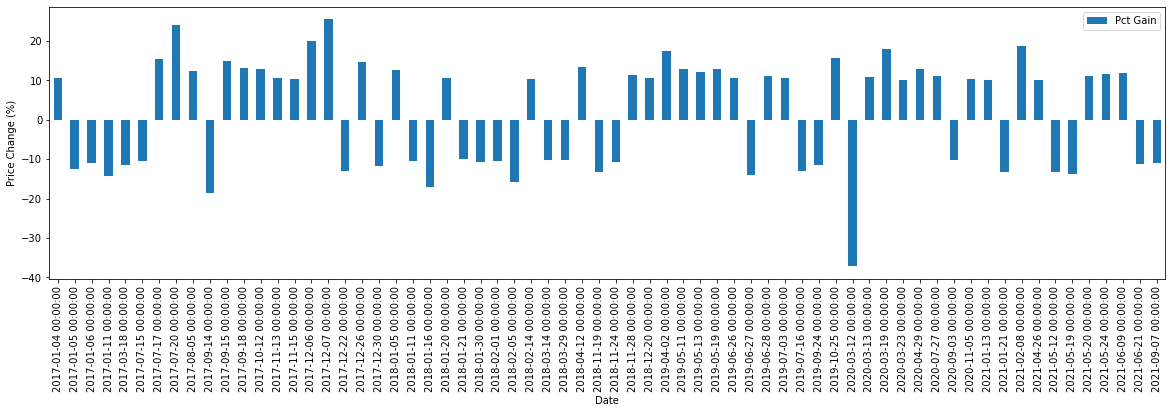

In [13]:
huge_days.plot.bar(x="Date", y="Pct Gain", figsize=(20,5), ylabel="Price Change (%)")

<AxesSubplot:xlabel='Date'>

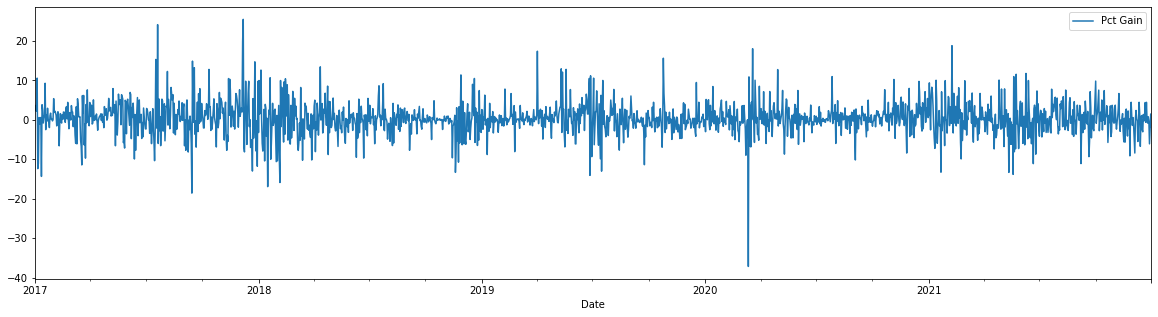

In [14]:
BTC_df.plot("Date", "Pct Gain", figsize=(20,5))

In [15]:
# Reset index in preparation for pivot
#BTC_month_day = BTC_month_day.reset_index()

In [16]:
# Create a pivot table with Months as index and Days as columns
#BTC_daily_pivot = BTC_month_day.pivot(index="Month", columns="Day", values="Pct Gain")

#BTC_daily_pivot

In [17]:
#BTC_daily_pivot.info()

In [18]:
#BTC_daily_pivot.plot()